## Exercise 11

In [2]:
import polars as pl
import seaborn as sns


df = pl.from_pandas(sns.load_dataset('penguins'))
df.describe()


describe,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,str,f64,f64,f64,f64,str
"""count""","""344""","""344""",344.0,344.0,344.0,344.0,"""344"""
"""null_count""","""0""","""0""",2.0,2.0,2.0,2.0,"""11"""
"""mean""",null,null,43.92193,17.15117,200.915205,4201.754386,null
"""std""",null,null,5.459584,1.974793,14.061714,801.954536,null
"""min""","""Adelie""","""Biscoe""",32.1,13.1,172.0,2700.0,"""Female"""
"""25%""",null,null,39.2,15.6,190.0,3550.0,null
"""50%""",null,null,44.5,17.3,197.0,4050.0,null
"""75%""",null,null,48.5,18.7,213.0,4750.0,null
"""max""","""Gentoo""","""Torgersen""",59.6,21.5,231.0,6300.0,"""Male"""


In [3]:
print(df.unique(subset='species'))
print(df.unique(subset='island'))
print(df.unique(subset='sex'))

shape: (3, 7)
┌───────────┬───────────┬────────────────┬───────────────┬──────────────────┬─────────────┬────────┐
│ species   ┆ island    ┆ bill_length_mm ┆ bill_depth_mm ┆ flipper_length_m ┆ body_mass_g ┆ sex    │
│ ---       ┆ ---       ┆ ---            ┆ ---           ┆ m                ┆ ---         ┆ ---    │
│ str       ┆ str       ┆ f64            ┆ f64           ┆ ---              ┆ f64         ┆ str    │
│           ┆           ┆                ┆               ┆ f64              ┆             ┆        │
╞═══════════╪═══════════╪════════════════╪═══════════════╪══════════════════╪═════════════╪════════╡
│ Gentoo    ┆ Biscoe    ┆ 46.1           ┆ 13.2          ┆ 211.0            ┆ 4500.0      ┆ Female │
│ Adelie    ┆ Torgersen ┆ 39.1           ┆ 18.7          ┆ 181.0            ┆ 3750.0      ┆ Male   │
│ Chinstrap ┆ Dream     ┆ 46.5           ┆ 17.9          ┆ 192.0            ┆ 3500.0      ┆ Female │
└───────────┴───────────┴────────────────┴───────────────┴──────────────────┴

1. 344 cases
2. * Bill Length (continuous)
   * Bill Depth (continuous)
   * Flipper Length (continuous)
   * Body mass (continuous)
3. * species
     * Adelie
     * Chinstrap
     * Gentoo
   * island
     * Biscoe
     * Dream
     * Torgersen
   * sex
     * Female
     * Male

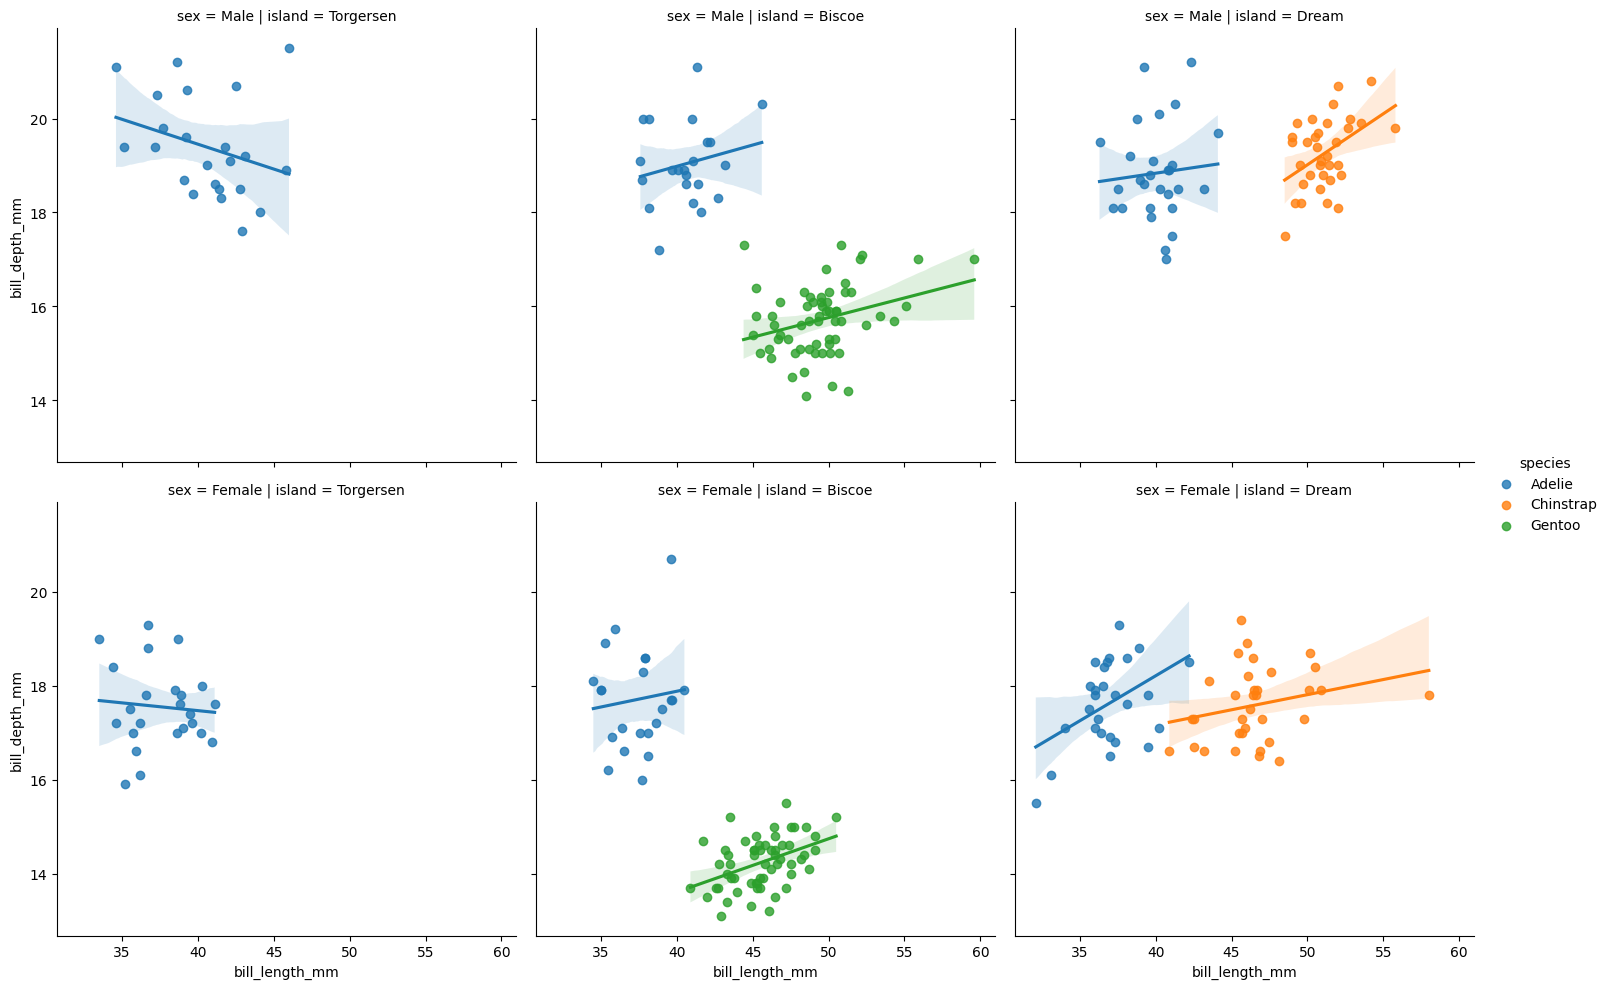

In [4]:
sns.lmplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    col='island',
    row='sex'
)

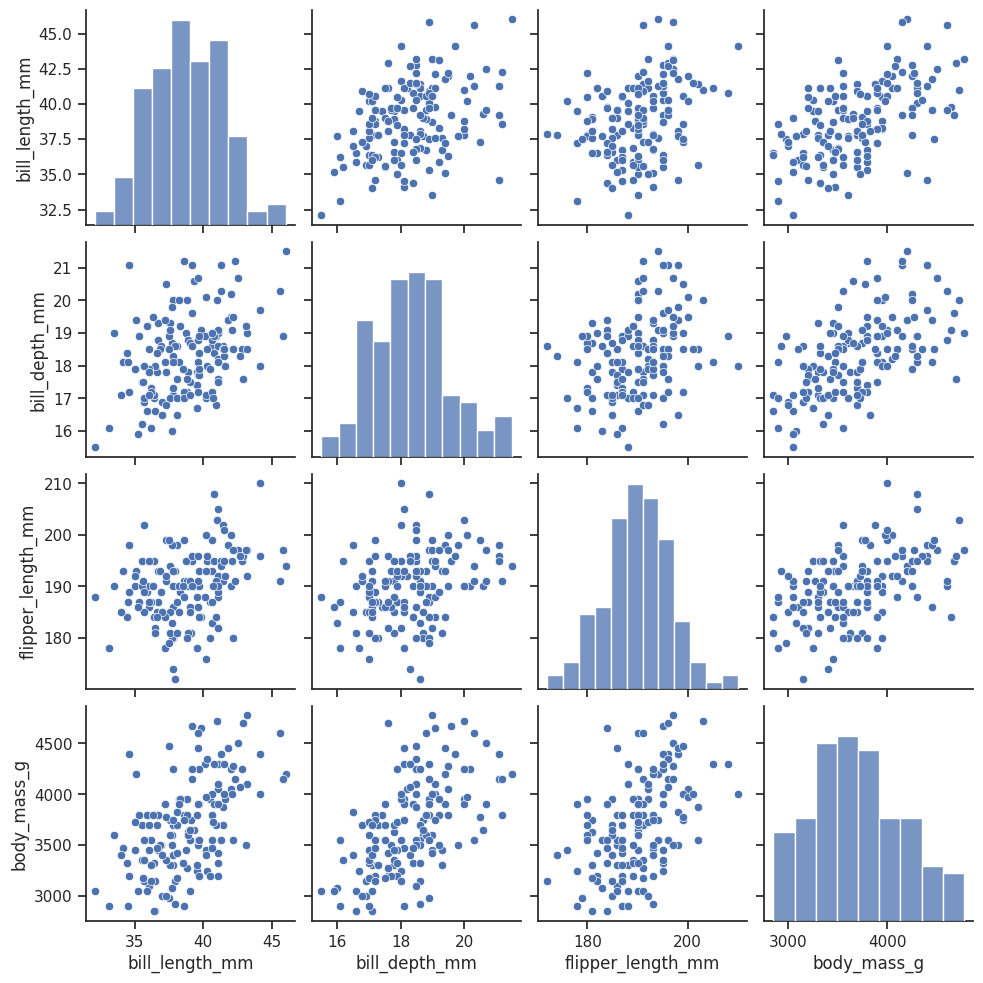

In [8]:
filtered=df.filter(pl.col('species') == 'Adelie')

sns.set_theme(style='ticks')
sns.pairplot(
    data=filtered.to_pandas()
)